# Random forest classifier

In the following we discuss the concept of a random forest classifier which is using the concept of a decision tree to start with. More precisely, in a random forest model one trains many decision trees which randomly vary from each other and that "vote" on the classification of a data point. To generate a random forest one simply generates a decision tree and at every decision point one does not consider one or more columns of the data set. For more details, we refer to: https://en.wikipedia.org/wiki/Random_forest and https://towardsdatascience.com/understanding-random-forest-58381e0602d2. 

In [71]:
#import necessary packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

from helper import plot_classifier #helper.py is saved in the repository

In [92]:
#define data frame
#this data set encompasses information on failure/success for each data point.
df = pd.read_csv("classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [93]:
#define variables
X = df[["age","interest"]].values

Y = df["success"].values # single brackets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

#rescaling of training and test data not needed for decision trees

In [74]:
#?RandomForestClassifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = "entropy", n_estimators = 30)
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

0.9466666666666667


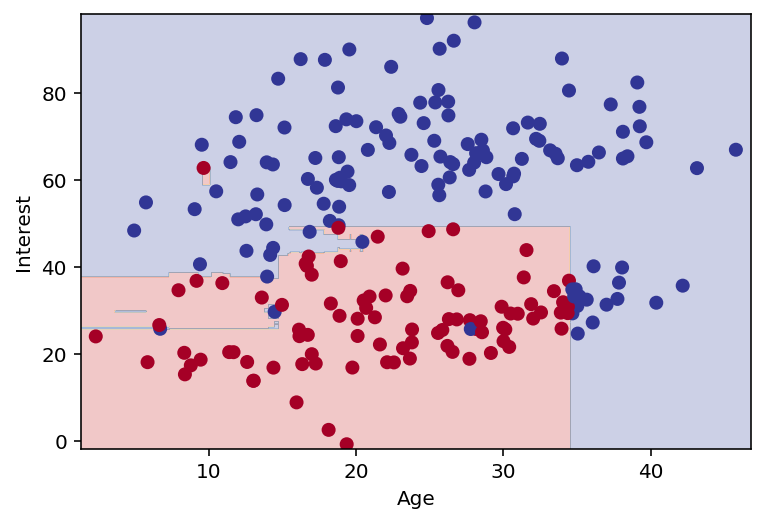

In [76]:
#plotting for the training data
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Age", ylabel = "Interest")

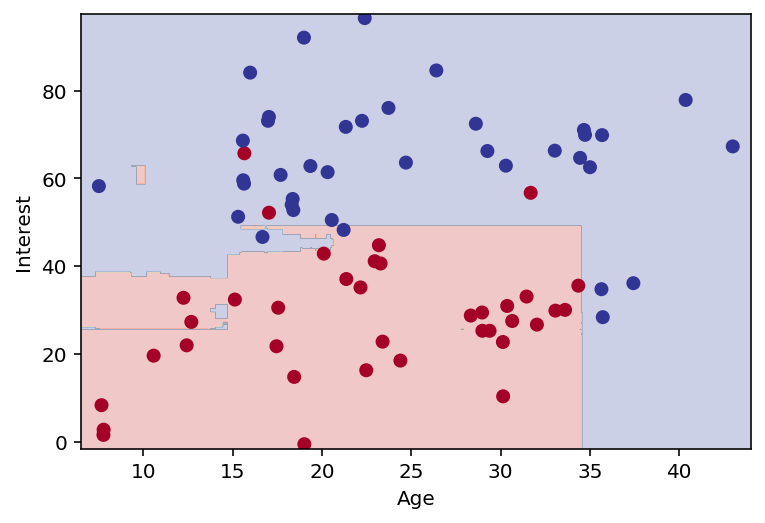

In [77]:
#plotting for the test data
plot_classifier(model, X_test, Y_test, proba = False, xlabel = "Age", ylabel = "Interest")

We would like to visualize decision regions:

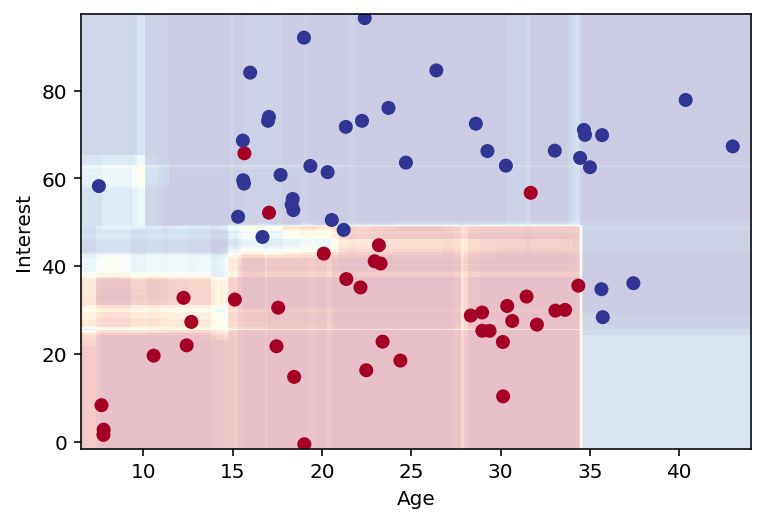

In [78]:
#plotting decision regions for the test data with "transitions"
plot_classifier(model, X_test, Y_test, proba = True, xlabel = "Age", ylabel = "Interest")

In [79]:
#listing all decision trees:
model.estimators_

#print(len(model.estimators_))

[DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=599273198, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1693298071, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
           

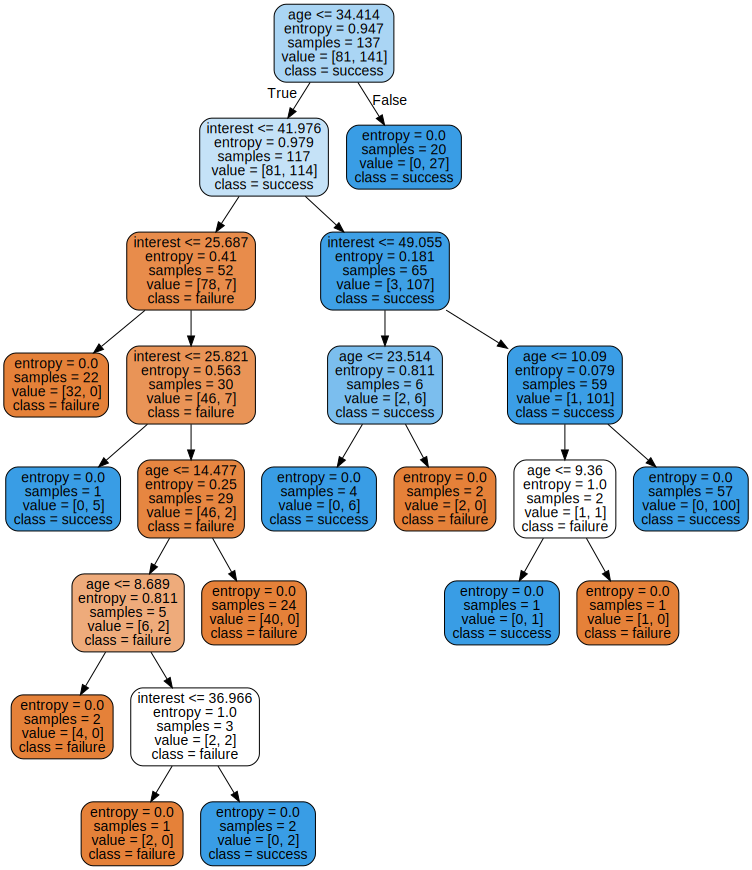

In [80]:
from sklearn.tree import export_graphviz
import graphviz

#print the 21st of the decision trees
tree = export_graphviz(model.estimators_[20], None, feature_names = ["age","interest"], class_names = ["failure", "success"], rounded = True, filled = True) #want to operate on the given model and not save it as a txt file
#options rounded = True, filled = True improve graphical output down below
#print(tree)

graphviz.Source(tree)

We can retrieve probabilities for failure vs. success from the forest for test data. 

In [81]:
model.predict_proba(X_test)

array([[0.03333333, 0.96666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.03333333, 0.96666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.03333333, 0.96666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.86666667, 0.13333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.03333333, 0.96666667],
       [0.03333333, 0.96666667],
       [0.03333333, 0.96666667],
       [1.        , 0.        ],
       [0.03333333, 0.96666667],
       [0.96666667, 0.03333333],
       [0.03333333, 0.96666667],
       [0.86666667, 0.13333333],
       [0.96666667, 0.03333333],
       [0.        , 1.        ],
       [0.03333333, 0.96666667],
       [0.

To extract the tree and save it we have to do the following:

In [39]:
src = graphviz.Source(tree, format = "png")
src.render("file")

'file.png'

We may further experiment with the random forest concept and combine it with (repeated) K-fold cross validation. For details, we refer to https://machinelearningmastery.com/k-fold-cross-validation/ and https://en.wikipedia.org/wiki/Cross-validation_(statistics). Notice that we can do this in an abbreviated fashion using an sklearn function:

In [89]:
#import additional packages
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

kf = KFold(n_splits = 10)
scores =  cross_val_score(RandomForestClassifier(criterion = "entropy", n_estimators = 30), X, Y, cv = kf)

print(scores)
print("The average score is: " + str(np.mean(scores)))

[0.96666667 0.93333333 1.         0.9        0.86666667 0.96666667
 0.96666667 0.93103448 0.96551724 0.93103448]
The average score is: 0.9427586206896551


In [91]:
#repeated K-fold cross validation
#import additional packages
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits = 10, n_repeats = 20)
scores =  cross_val_score(RandomForestClassifier(criterion = "entropy", n_estimators = 30), X, Y, cv = rkf)

print(scores)
print("The average score is: " + str(np.mean(scores)))

[1.         0.96666667 0.86666667 0.9        0.93333333 0.96666667
 0.96666667 0.89655172 1.         1.         0.93333333 0.93333333
 0.9        1.         0.96666667 0.93333333 0.93333333 0.93103448
 0.96551724 0.96551724 0.9        0.96666667 1.         0.9
 0.96666667 0.93333333 0.9        0.93103448 0.96551724 1.
 0.96666667 0.93333333 0.93333333 0.96666667 0.86666667 0.96666667
 0.93333333 0.93103448 0.93103448 0.96551724 0.96666667 0.9
 0.93333333 0.86666667 0.96666667 0.96666667 0.96666667 1.
 0.96551724 0.89655172 0.93333333 0.96666667 0.96666667 1.
 0.93333333 0.93333333 0.93333333 0.93103448 0.86206897 0.96551724
 0.93333333 0.93333333 1.         0.96666667 0.96666667 0.9
 0.93333333 0.79310345 1.         0.93103448 0.93333333 1.
 1.         0.86666667 0.93333333 0.93333333 0.93333333 0.89655172
 0.93103448 0.96551724 0.86666667 0.93333333 1.         0.93333333
 0.96666667 0.93333333 1.         0.93103448 1.         0.89655172
 0.93333333 0.96666667 0.96666667 0.93333333 0.9

We observe that the score is about the same for K-fold cross validation (single or repeated) as compared to the simple random forest classifier on the same data.